In [21]:
#Import some of the tools I know I will need:
import numpy as np
import pandas as pd
import requests
import zipfile
import io
from datetime import datetime
import random
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats


%matplotlib inline

## Part 1: Explore and prepare data

In [2]:
csv_file = '/Users/torrie/DataFilesForGitProjects/breast_cancer_data.csv'
data_df = pd.read_csv(csv_file)
data_df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.990,10.38,122.80,1001.0,0.11840,0.27760,0.300100,0.147100,...,17.33,184.60,2019.0,0.16220,0.66560,0.71190,0.26540,0.4601,0.11890,NaN
1,842517,M,20.570,17.77,132.90,1326.0,0.08474,0.07864,0.086900,0.070170,...,23.41,158.80,1956.0,0.12380,0.18660,0.24160,0.18600,0.2750,0.08902,NaN
2,84300903,M,19.690,21.25,130.00,1203.0,0.10960,0.15990,0.197400,0.127900,...,25.53,152.50,1709.0,0.14440,0.42450,0.45040,0.24300,0.3613,0.08758,NaN
3,84348301,M,11.420,20.38,77.58,386.1,0.14250,0.28390,0.241400,0.105200,...,26.50,98.87,567.7,0.20980,0.86630,0.68690,0.25750,0.6638,0.17300,NaN
4,84358402,M,20.290,14.34,135.10,1297.0,0.10030,0.13280,0.198000,0.104300,...,16.67,152.20,1575.0,0.13740,0.20500,0.40000,0.16250,0.2364,0.07678,NaN
5,843786,M,12.450,15.70,82.57,477.1,0.12780,0.17000,0.157800,0.080890,...,23.75,103.40,741.6,0.17910,0.52490,0.53550,0.17410,0.3985,0.12440,NaN
6,844359,M,18.250,19.98,119.60,1040.0,0.09463,0.10900,0.112700,0.074000,...,27.66,153.20,1606.0,0.14420,0.25760,0.37840,0.19320,0.3063,0.08368,NaN
7,84458202,M,13.710,20.83,90.20,577.9,0.11890,0.16450,0.093660,0.059850,...,28.14,110.60,897.0,0.16540,0.36820,0.26780,0.15560,0.3196,0.11510,NaN
8,844981,M,13.000,21.82,87.50,519.8,0.12730,0.19320,0.185900,0.093530,...,30.73,106.20,739.3,0.17030,0.54010,0.53900,0.20600,0.4378,0.10720,NaN
9,84501001,M,12.460,24.04,83.97,475.9,0.11860,0.23960,0.227300,0.085430,...,40.68,97.65,711.4,0.18530,1.05800,1.10500,0.22100,0.4366,0.20750,NaN


In [6]:
data_df.shape

(569, 33)

In [5]:
data_df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [8]:
data_df = data_df.drop(['Unnamed: 32'], axis =1) 

In [10]:
data_df.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [11]:
data_df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


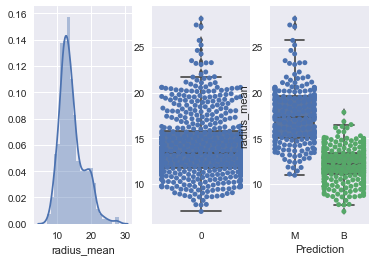

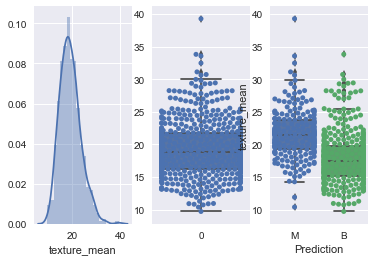

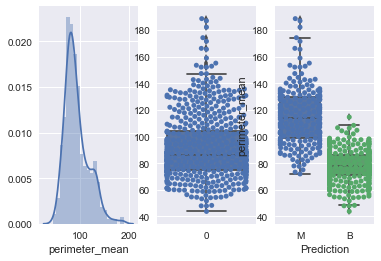

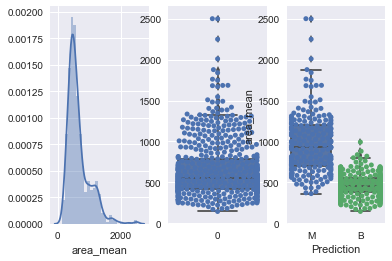

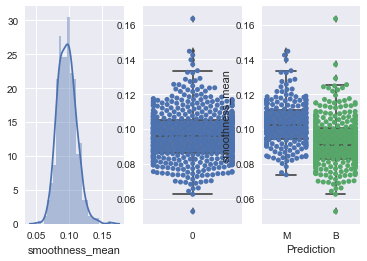

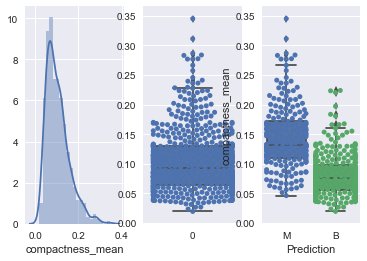

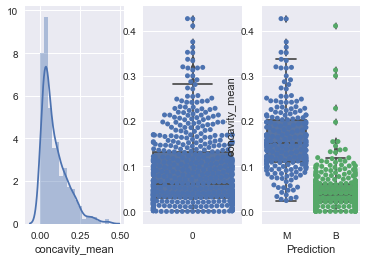

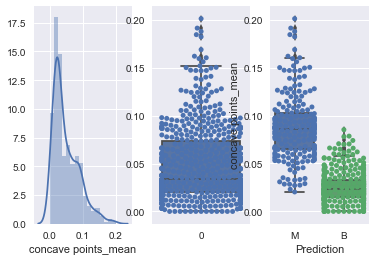

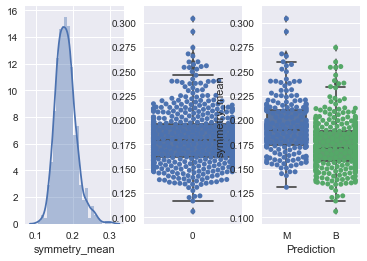

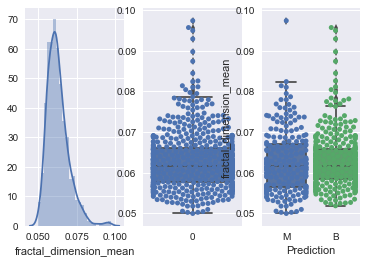

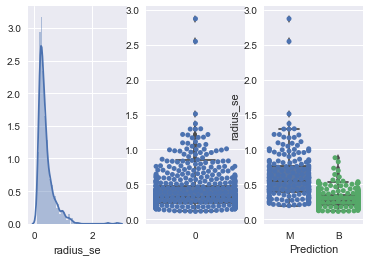

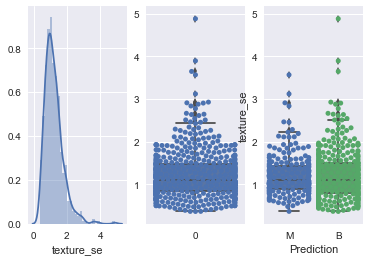

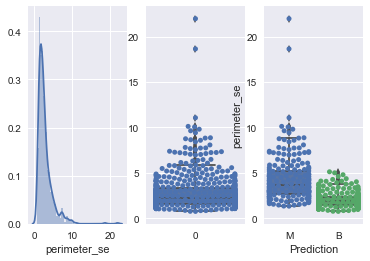

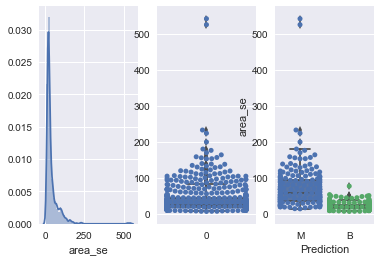

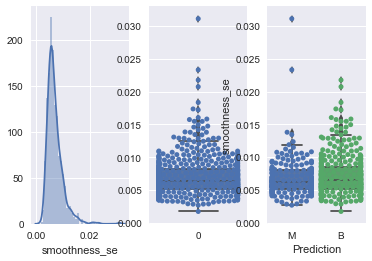

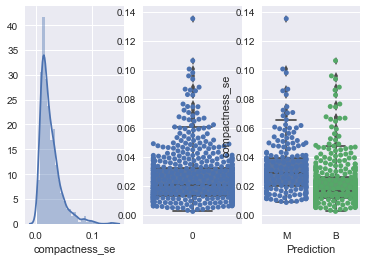

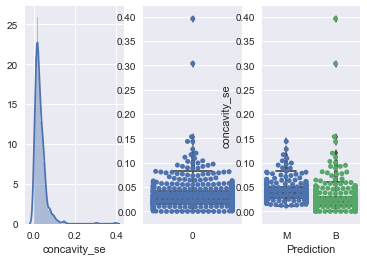

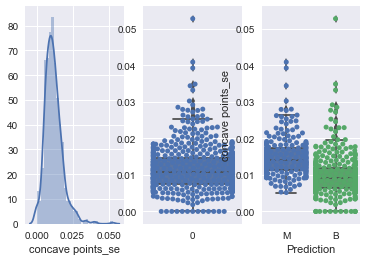

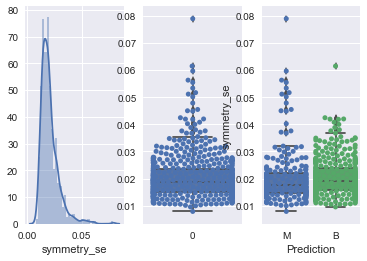

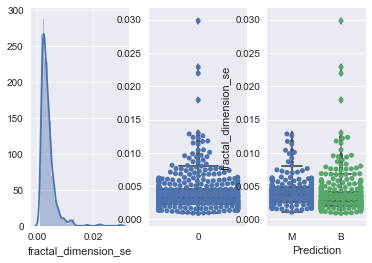

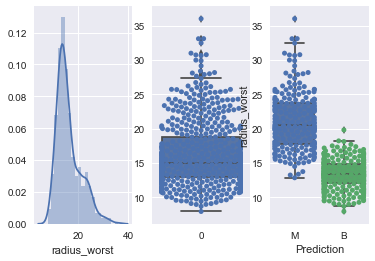

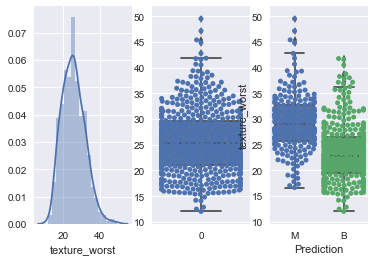

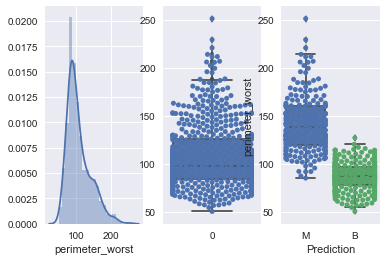

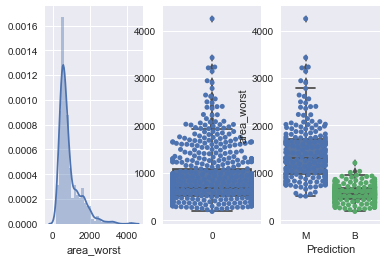

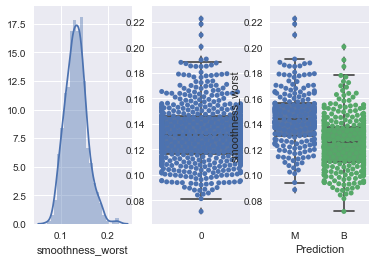

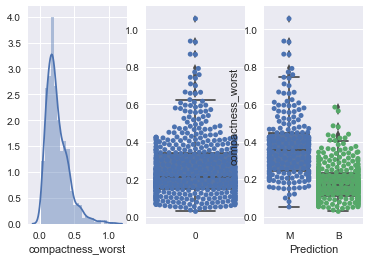

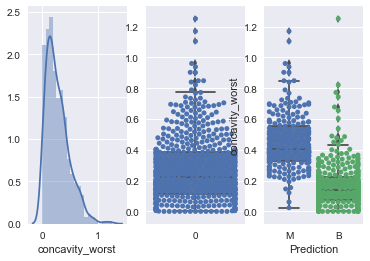

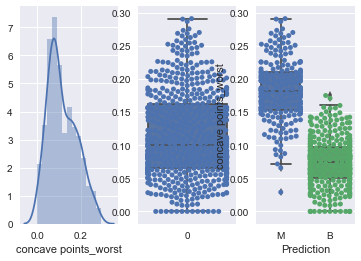

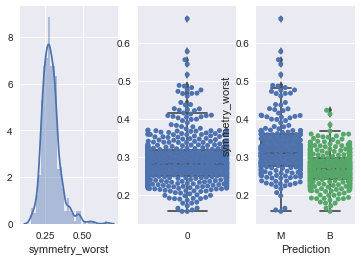

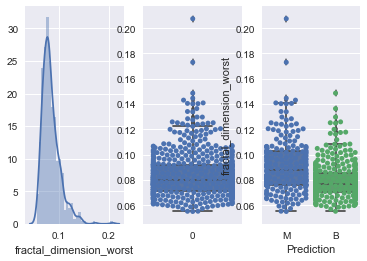

In [39]:
df1 = data_df.select_dtypes([np.int, np.float])
df1 = df1.drop('id', axis =1)
for i,col in enumerate(df1.columns):
    
    data_box = pd.DataFrame(columns=[col, 'Prediction'])
    data_box[col] = data_df[col]
    data_box['Prediction'] = data_df['diagnosis']
    
    fig, axs = plt.subplots(ncols=3)
    sns.distplot(data_df[col], kde='True',ax=axs[0])
    #sns.regplot(x='value', y='wage', data=df_melt, ax=axs[0])
    sns.boxplot(data=data_box[col], ax=axs[1])
    sns.swarmplot(data=data_box[col], ax=axs[1])
    sns.boxplot(y=col, x="Prediction", data=data_box, ax=axs[2])
    sns.swarmplot(y=col, x="Prediction", data=data_box, ax=axs[2])



In this case, the data is actually quite clean. Some of the features are not distributed normally (more log-normal), and there are some outliers but they seem to still be within reason.  I will create a df with all the outlier dropped, but at this time I see no reason to do the analysis with dropped data.

To find the outliers in the dataframe I find the quartile values and calculate the IQR (the distance between 25% and 75%). The Tukey boxplot calls any data point outside the region of 1.5IQR less than the lower quartile (25%) or greater than 1.5IQR greater than the upper quartile (75%) an outlier. The seaborn plot uses these criteria, so that is what I would use it for analysis.

In [132]:
def drop_outliers(df, group_by = None):
    df_sans_outliers = df.copy()
    drop_list = []
    if group_by == None:
        for item in df_sans_outliers.select_dtypes([np.int, np.float]).columns:
            median = np.median(df_sans_outliers[item])
            upper_quartile = np.percentile(df_sans_outliers[item], 75)
            lower_quartile = np.percentile(df_sans_outliers[item], 25)
            IQR = 1.5*(upper_quartile - lower_quartile)
            upper_IQR = upper_quartile + IQR
            lower_IQR = lower_quartile - IQR
            drop_low = df_sans_outliers[(df_sans_outliers[item]< lower_IQR)].index.tolist()
            drop_list.extend(drop_low) 
            drop_high = df_sans_outliers[(df_sans_outliers[item]> upper_IQR)].index.tolist()
            drop_list.extend(drop_high) 
    else:   
        group_values = df_sans_outliers[group_by].unique()
        for item in df_sans_outliers.drop(group_by, axis = 1).select_dtypes([np.int, np.float]).columns:
            for group in group_values:
                median = np.median(df_sans_outliers[item][df_sans_outliers[group_by] == group])
                upper_quartile = np.percentile((df_sans_outliers[item][df_sans_outliers[group_by] == group]), 75)
                lower_quartile = np.percentile((df_sans_outliers[item][df_sans_outliers[group_by] == group]), 25)
                IQR = 1.5*(upper_quartile - lower_quartile)
                upper_IQR = upper_quartile + IQR
                lower_IQR = lower_quartile - IQR
                drop_low = df_sans_outliers[df_sans_outliers[item] < lower_IQR].index.tolist()
                drop_high = df_sans_outliers[df_sans_outliers[item] > upper_IQR].index.tolist()
                drop_list.extend(drop_low) 
                drop_list.extend(drop_high) 
    drop_list = set(drop_list)   
    
    return drop_list




In [133]:
drop_list = drop_outliers(data_df.drop('id', axis =1), 'diagnosis')   
print(len(drop_list))



424


In [145]:
drop_list = drop_outliers(data_df.drop('id', axis =1))   
print(len(drop_list))


171


In [150]:
print(data_df.shape)
data_df_out = data_df.drop(drop_list, axis = 0).reset_index().drop('index', axis = 1)
print(data_df_out.shape)
#data_df_out.head()

(569, 32)
(398, 32)


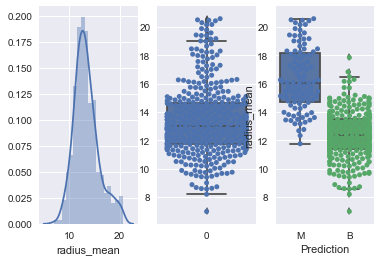

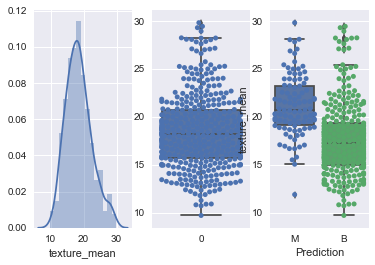

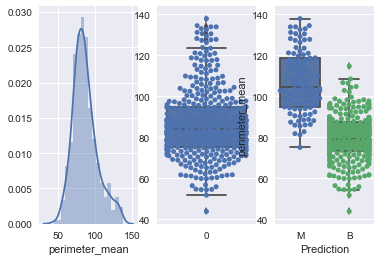

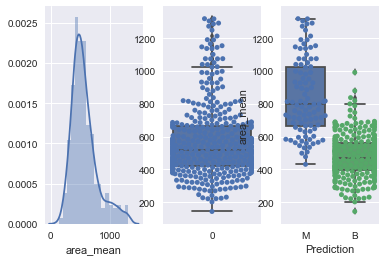

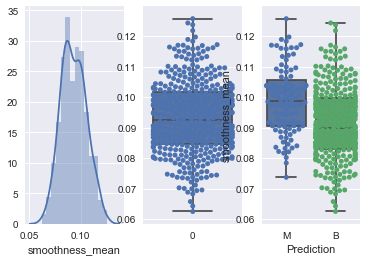

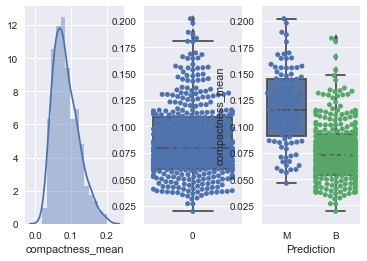

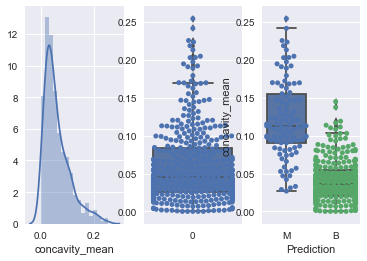

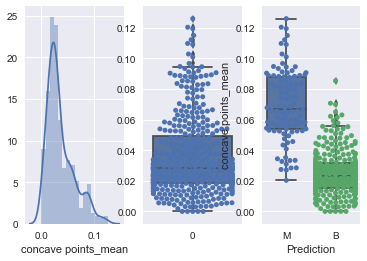

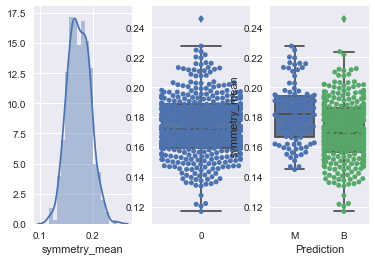

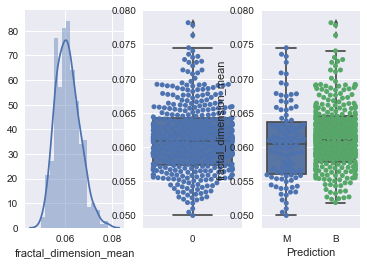

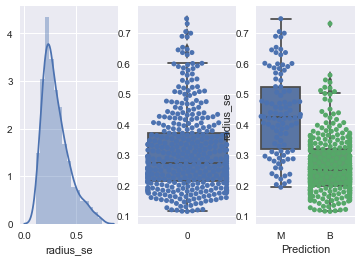

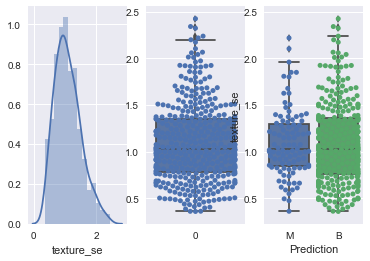

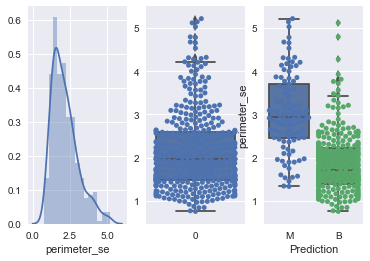

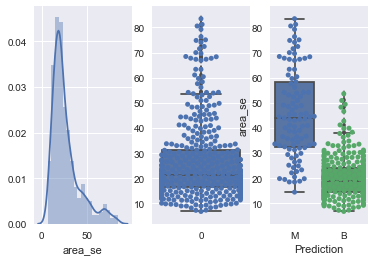

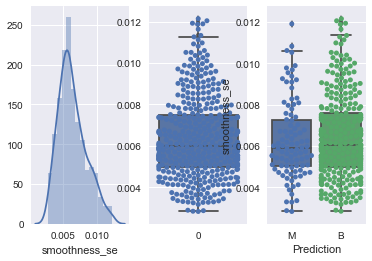

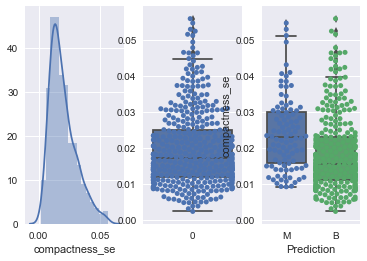

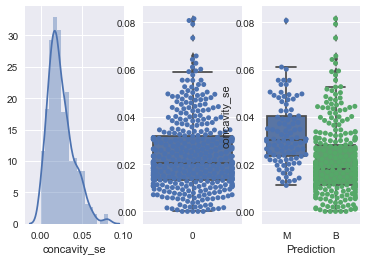

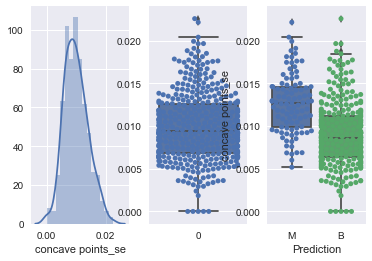

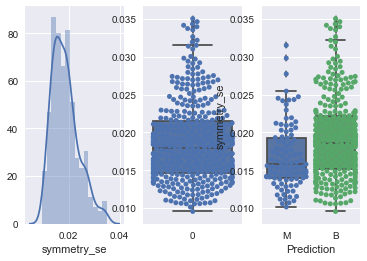

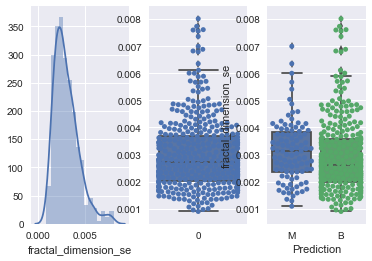

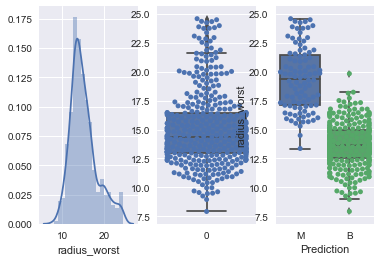

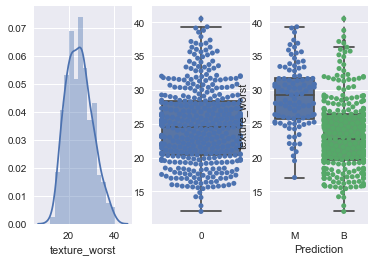

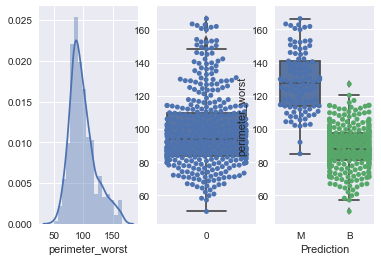

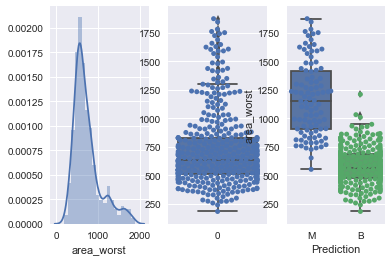

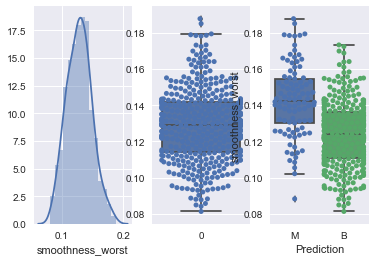

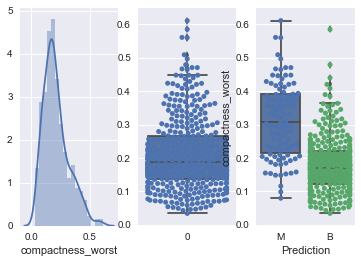

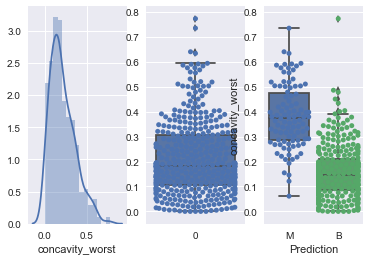

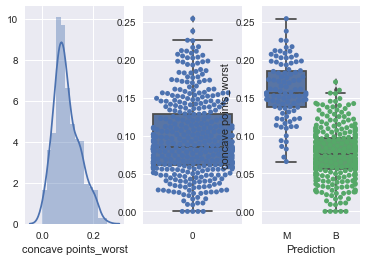

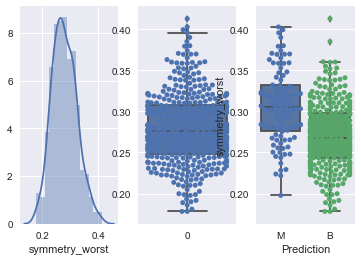

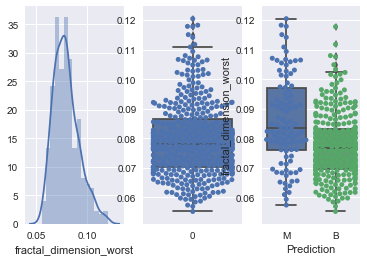

In [151]:
df1 = data_df_out.select_dtypes([np.int, np.float])
df1 = df1.drop('id', axis =1)
for i,col in enumerate(df1.columns):
    #print(col)
    data_box = pd.DataFrame(columns=[col, 'Prediction'])
    data_box[col] = data_df_out[col]
    data_box['Prediction'] = data_df_out['diagnosis']
    fig, axs = plt.subplots(ncols=3)
    sns.distplot(data_df_out[col], kde='True',ax=axs[0])
    #print(data_box[col])
    sns.boxplot(data=data_box[col], ax=axs[1])
    sns.swarmplot(data=data_box[col], ax=axs[1])
    sns.boxplot(y=col, x="Prediction", data=data_box, ax=axs[2])
    sns.swarmplot(y=col, x="Prediction", data=data_box, ax=axs[2])



## Part 2: Check models

A couple of thoughts: 
Feature engineering: Looks like there are several dimensional features (diameter, perimeter, mean, max, etc.). These should all be somewhat related/correlated. Check this and think of ways to combine/eliminate features. 
Models to try:
logisitic regression
KNN
SVM
Tree ensembles
Deep learning (what should I try here? Anything worthwhile?)

In [152]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

X = data_df.drop(['id', 'diagnosis'], axis = 1)
X_scaled = preprocessing.scale(X)
y = data_df['diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y,test_size = 0.35, random_state = 3)


### Logistic Regression

In [153]:
from sklearn.linear_model import LogisticRegressionCV

logregcv = LogisticRegressionCV(cv = 3, random_state = 3)
logregcv.fit(X_train, y_train)

LogisticRegressionCV(Cs=10, class_weight=None, cv=3, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='ovr', n_jobs=1, penalty='l2', random_state=3,
           refit=True, scoring=None, solver='lbfgs', tol=0.0001, verbose=0)

In [154]:
train_cv = logregcv.score(X_train, y_train)
print(train_cv)
test_cv = logregcv.score(X_test, y_test)
print(test_cv)

0.986449864499
0.985


In [158]:
print(logregcv.classes_)
print(logregcv.C_)
print(logregcv.intercept_)
print(logregcv.coef_)

['B' 'M']
[ 0.35938137]
[-0.41460065]
[[ 0.45415712  0.38114514  0.43497942  0.46101377  0.16559744 -0.23162589
   0.51755153  0.53802922 -0.03718462 -0.32070288  0.79831918  0.14937684
   0.54890109  0.56267248  0.11094625 -0.48577055 -0.09510389  0.22007105
  -0.24824131 -0.33814108  0.69973916  0.85717866  0.61025137  0.64143528
   0.58146414  0.07770084  0.66344902  0.58515537  0.74101534  0.22674335]]


In [157]:
logregcv.scores_

{'M': array([[ 0.62601626,  0.82926829,  0.96747967,  0.99186992,  1.        ,
          0.97560976,  0.94308943,  0.93495935,  0.93495935,  0.93495935],
        [ 0.61788618,  0.82113821,  0.89430894,  0.93495935,  0.93495935,
          0.93495935,  0.94308943,  0.94308943,  0.95121951,  0.95121951],
        [ 0.61788618,  0.82113821,  0.92682927,  0.96747967,  0.97560976,
          0.96747967,  0.95121951,  0.95121951,  0.93495935,  0.93495935]])}

### kNN

In [180]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

param_grid = {'n_neighbors': range(1, 31),
              'weights': ['uniform', 'distance']}

rand = RandomizedSearchCV(KNeighborsClassifier(), 
                          param_grid, 
                          cv=3, 
                          scoring='accuracy',
                          n_iter=10)

rand = rand.fit(X_train, y_train)

rand.cv_results_['mean_test_score']

print(rand.best_estimator_, rand.best_score_)

print(accuracy_score(y_test, rand.best_estimator_.predict(X_test)))

(KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=4, p=2,
           weights='distance'), 0.964769647696477)
0.97


## SVM

In [183]:
from sklearn import svm

for fig_num, kernel in enumerate(('linear', 'rbf', 'poly')):
    clf = svm.SVC(kernel=kernel)
    clf.fit(X_train, y_train)
    print(clf.get_params())
    print(accuracy_score(y_test, clf.predict(X_test)))

{'kernel': 'linear', 'C': 1.0, 'verbose': False, 'probability': False, 'degree': 3, 'shrinking': True, 'max_iter': -1, 'decision_function_shape': None, 'random_state': None, 'tol': 0.001, 'cache_size': 200, 'coef0': 0.0, 'gamma': 'auto', 'class_weight': None}
0.985
{'kernel': 'rbf', 'C': 1.0, 'verbose': False, 'probability': False, 'degree': 3, 'shrinking': True, 'max_iter': -1, 'decision_function_shape': None, 'random_state': None, 'tol': 0.001, 'cache_size': 200, 'coef0': 0.0, 'gamma': 'auto', 'class_weight': None}
0.98
{'kernel': 'poly', 'C': 1.0, 'verbose': False, 'probability': False, 'degree': 3, 'shrinking': True, 'max_iter': -1, 'decision_function_shape': None, 'random_state': None, 'tol': 0.001, 'cache_size': 200, 'coef0': 0.0, 'gamma': 'auto', 'class_weight': None}
0.915
